In [121]:
import pandas as pd
import numpy as np


In [122]:
pd.set_option('Display.max_rows',None)
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_colwidth',None)

In [123]:
df=pd.read_csv(r'B:\Major_Git\Capstone-99acres\data\external\gurgaon_properties_cleaned_v1.csv')

In [124]:
df.sample()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
598,house,independent,sector 4,0.4,8889.0,450.0,Plot area 50(41.81 sq.m.),1,1,0,not available,1.0,NaN,5 to 10 Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Prateek Nursing Home And Polyclinic', 'Sneh Hospital Gurgaon', 'Dr. Hitesh Dawar', 'Kr Dental Hub', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhardwaj Hospital', 'Dr. Mittal Clinic', 'Jiya Clinic', 'Dr. Sindhu Clinic', 'Shree Krishna Hospital Gurgaon', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Gurgaon Eye Centre', 'R K Hospital Gurgaon', 'Dr. Ashok Jain', 'Pearl Dental Clinic', 'Chirag Hospital Pvt. Ltd', 'Esic Hospital Gurugram', 'Aryan Hospital', 'Taneja Hospital', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Geeta Nursing Home Gurgaon', 'Dr. Agya Ram Sharma Clinic', 'GH Gurgaon', 'Ravi Clinic and Health Care Centre', 'Bhatnagar Maternity and Nursing Home', 'Chiranjiv Hospital', 'Dr. Sarvejeet Singh', 'Dr. Madan Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Bindal Clinic', 'Kidney Clinic', 'Swastik Maternity and Medical Centre', 'Dev Man Kathuria Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']",[],NaN


In [125]:
df.duplicated().sum()

125

AreaWithType

In [126]:
import re
def get_super_built_up_area(text):
    match=re.search(r'Super Built up area (\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    return None
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value


In [127]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [128]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [129]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [130]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [131]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
11,0.37,house,360.0,Plot area 360(33.45 sq.m.),NaN,NaN,NaN
12,0.58,house,67.0,Plot area 67(6.22 sq.m.),NaN,NaN,NaN
14,17.30,house,4466.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
16,7.35,house,1760.0,Plot area 240(200.67 sq.m.),NaN,NaN,NaN
18,12.00,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN
19,11.00,house,4125.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
27,3.35,house,1242.0,Plot area 138(115.39 sq.m.),NaN,NaN,NaN
30,3.20,house,2230.0,Plot area 2160(200.67 sq.m.),NaN,NaN,NaN
37,3.65,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN
38,0.51,house,360.0,Plot area 40(33.45 sq.m.),NaN,NaN,NaN


In [132]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [133]:
df.update(all_nan_df)
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    20
price_per_sqft           20
area                     20
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 21
facing                 1177
agePossession             1
nearbyLocations         207
furnishDetails         1032
features                709
super_built_up_area    2027
built_up_area          2113
carpet_area            1958
dtype: int64

Additional Rooms

In [134]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1691
servant room                                      710
study room                                        251
others                                            237
pooja room                                        170
store room                                        107
study room,servant room                           100
pooja room,servant room                            84
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room,others          57
pooja room,study room,servant room                 57
servant room,pooja room                            38
servant room,store room                            34
study room,others                                  30
pooja room,study room                              24
pooja room,others                                  17
pooja room,store room                              17
servant room,

In [135]:
# List of all rooms to be created 
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

for col in new_cols:
    df[col]=df['additionalRoom'].str.contains(col).astype(int)

In [136]:
df.sample(5)[['study room', 'servant room', 'store room', 'pooja room', 'others','additionalRoom']]

,study room,servant room,store room,pooja room,others,additionalRoom
1891,0,0,0,0,0,not available
2373,1,0,0,0,0,study room
996,0,0,1,0,0,store room
2171,1,0,0,0,0,study room
2868,0,0,1,0,0,store room


Age Possession

In [137]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1705
5 to 10 Year Old       610
0 to 1 Year Old        551
undefined              358
10+ Year Old           353
Under Construction      92
Within 6 months         70
Within 3 months         26
Dec-23                  22
By 2023                 19
By 2024                 17
Dec-24                  16
Mar-24                  14
Jan-24                   8
Oct-24                   8
Aug-23                   7
Jun-24                   7
Dec-25                   7
Nov-23                   5
Aug-24                   5
Oct-23                   4
Sep-23                   4
Jan-25                   4
Jul-24                   4
By 2025                  4
Feb-24                   3
May-24                   3
Nov-24                   3
Apr-26                   2
Aug-25                   2
Jul-27                   2
Sep-25                   2
Mar-25                   2
By 2027                  2
Dec-26                   2
Jan-26                   2
Jun-27        

In [138]:
def categorize_age_possession(value):
    if pd.isna(value):
        return 'Undefined'
    if 'Within 3 months'in value or 'Within 6 months'in value or '0 to 1 Year Old'in value:
        return 'New Property'
    if '1 to 5 Year Old'in value:
        return 'Relatively New'
    if '5 to 10 Year Old'in value:
        return 'Moderately Old'
    if '10+ Year Old'in value:
        return 'Old Property'
    if 'Under Construction'in value or 'By'in value :
        return 'Under Construction'
    try:
        int(value.split(' ')[-1])
        return 'Under Construction'
    except:
        return 'Undefined'

In [139]:
df['agePossession']=df['agePossession'].apply(categorize_age_possession)

In [140]:
df['agePossession'].value_counts()

agePossession
Relatively New        1705
New Property           647
Moderately Old         610
Undefined              512
Old Property           353
Under Construction     134
Name: count, dtype: int64

Furnish Details 

In [141]:
df['furnishDetails'].value_counts()

furnishDetails
[]                                                                                                                                                                                                                                                                       441
['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']     214
['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']      75
['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fri

In [142]:
all_furnishings=[]
for details in df['furnishDetails'].dropna():
    furnishings=details.replace('[','').replace(']','').replace("'",'').split(',')
    all_furnishings.extend(furnishings)
unique_furnishings=list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0


# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [143]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\ombha\AppData\Local\Temp\ipykernel_7236\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [144]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [145]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

c:\Users\ombha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ombha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ombha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ombha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

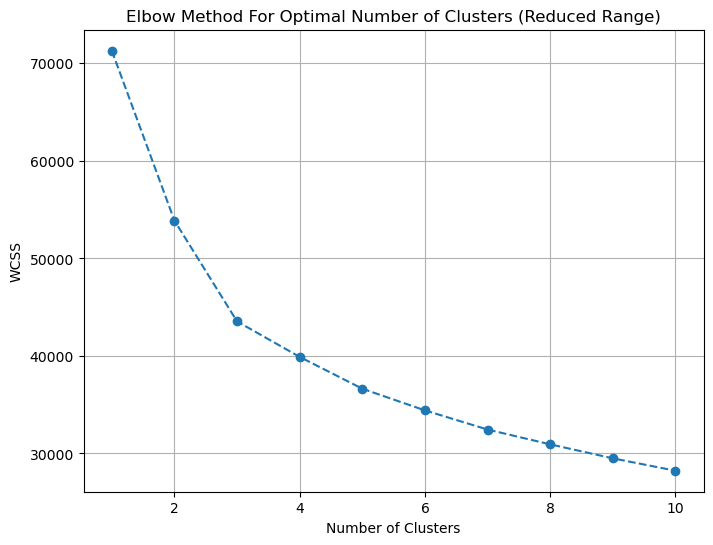

In [146]:
    # Plot the results
plt.figure(figsize=(8, 6))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [147]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row

c:\Users\ombha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [148]:
# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [149]:
df = df.iloc[:,:-18]
df['furnishing_type'] = cluster_assignments
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
218,NaN,1
541,[],1
1529,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '4 Geyser', '12 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '4 Curtains', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
3658,NaN,1
2606,"['2 Fan', '1 Exhaust Fan', '2 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1


In [150]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,flat,sare homes,sector 92,0.60,5000.0,1200.0,Carpet area: 1200 (111.48 sq.m.),3,2,3,not available,4.0,NaN,Moderately Old,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. Sarkar Clinic', 'Sagar Clinic', 'Vijay Petrol Pump', 'HP Petrol Pump', 'Essar Petrol Pump', 'Indian Oil']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '5 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,1200.0,0,0,0,0,0,0
1,flat,ireo skyon,sector 60,3.60,12815.0,2809.0,Super Built up area 2809(260.96 sq.m.)Carpet area: 2400 sq.ft. (222.97 sq.m.),4,5,3,servant room,24.0,North-East,Relatively New,"['Sector 55-56 Metro', 'Golf Course Extension', 'Adarsh Senior Secondary School', 'Swastik Hospital Sec 66', 'IGI Airport', 'Surajgarh Gurgaon, Golf Course Ext Rd', 'International Tech Park Gurgaon,']","['7 Wardrobe', '1 Water Purifier', '6 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '20 Light', '6 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2809.0,NaN,2400.0,0,1,0,0,0,0
2,flat,shapoorji pallonji joyville gurugram,sector 102,0.97,10601.0,915.0,Super Built up area 915(85.01 sq.m.),2,2,2,not available,12.0,East,Relatively New,"['Khan Market', 'The Esplanade Mall', 'Dwarka Expressway', 'Garhi Road', 'Delhi Public School', 'SGT University', 'Aryan Hospital', 'Indira Gandhi Int. Airport', 'Basai Dhankot', 'The Executive Centre', 'Inde Hotels & Resorts', 'Appu Ghar', 'DLF Golf and Country Club']",[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",915.0,NaN,NaN,0,0,0,0,0,1
3,house,rattan garden,sector 7,1.30,13499.0,963.0,Built Up area: 963 (89.47 sq.m.),5,3,2,not available,3.0,NaN,Old Property,"['Chintapurni Mandir', 'Aryan Hospital', 'D.R. Rajnis Gupta Clinic', 'Geeta Nursing Home Gurgaon', 'Ravi Clinic and Health Care Centre', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Gurgaon Eye Centre', 'Chiranjiv Hospital', 'Bindal Clinic', 'Pearl Dental Clinic', 'M.S Hospital', 'Taneja Hospital', 'Dr. Sarvejeet Singh', 'My Care Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Triveni Hospital Gurgaon', 'Kidney Clinic', 'Dr. Ashok Jain', 'Swastik Maternity and Medical Centre', 'Dr. Agya Ram Sharma Clinic', 'Kharbanda Maternity and Nursing Home', 'Lalit Dental Care', 'Dr. Madan Clinic', 'Dentecare - Multispeciality Dental Clinic', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lall Nursing and Maternity Home', 'M Goel Hospital', 'Dev Man Kathuria Clinic', 'Gupta Hospital Gurgaon', 'Jackson Hospital', 'Dental Health Centre', 'Satyam Hospital Gurgaon', 'Dr. Ajay S. Gupta Clinic', 'Sarvodya Hospital', 'GH Gurgaon', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Dr. Sindhu Clinic', 'Sharma Hospital Gurgaon', 'Sta

Features

In [151]:
df[['society','features']].sample(5)

,society,features
796,ireo skyon,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2166,smart world orchard,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking']"
121,sidhivinayak apartments,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
3117,today callidora,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']"
608,palam vihar society,"['Centrally Air Conditioned', 'Lift(s)', 'Park', 'Maintenance Staff', 'Visitor Parking', 'Security Personnel']"


In [153]:
df['features'].isnull().sum()

709

In [155]:
app_df=pd.read_csv(r'B:\Major_Git\Capstone-99acres\data\external\appartments.csv')

In [156]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()
temp_df = df[df['features'].isnull()]
temp_df.shape

(709, 26)

In [157]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']
df.loc[temp_df.index,'features'] = x.values
df['features'].isnull().sum()

552

In [158]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [159]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

c:\Users\ombha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ombha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ombha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ombha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

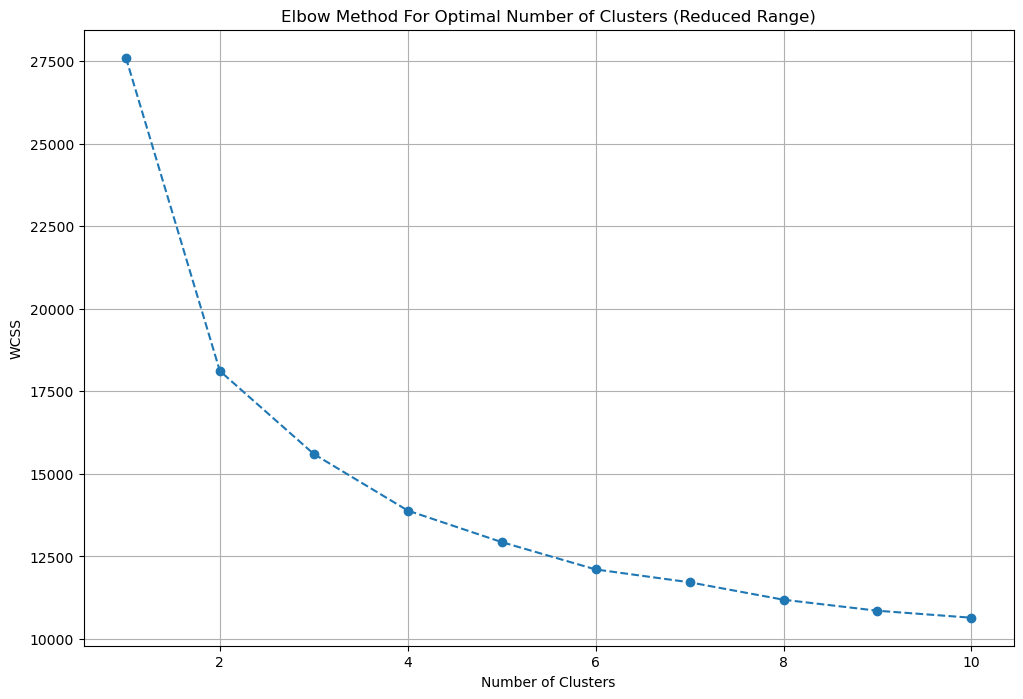

In [160]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [161]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [162]:
df['luxury_score'] = luxury_score
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,sare homes,sector 92,0.60,5000.0,1200.0,Carpet area: 1200 (111.48 sq.m.),3,2,3,not available,4.0,NaN,Moderately Old,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. Sarkar Clinic', 'Sagar Clinic', 'Vijay Petrol Pump', 'HP Petrol Pump', 'Essar Petrol Pump', 'Indian Oil']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '5 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,1200.0,0,0,0,0,0,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
1,flat,ireo skyon,sector 60,3.60,12815.0,2809.0,Super Built up area 2809(260.96 sq.m.)Carpet area: 2400 sq.ft. (222.97 sq.m.),4,5,3,servant room,24.0,North-East,Relatively New,"['Sector 55-56 Metro', 'Golf Course Extension', 'Adarsh Senior Secondary School', 'Swastik Hospital Sec 66', 'IGI Airport', 'Surajgarh Gurgaon, Golf Course Ext Rd', 'International Tech Park Gurgaon,']","['7 Wardrobe', '1 Water Purifier', '6 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '20 Light', '6 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2809.0,NaN,2400.0,0,1,0,0,0,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
2,flat,shapoorji pallonji joyville gurugram,sector 102,0.97,10601.0,915.0,Super Built up area 915(85.01 sq.m.),2,2,2,not available,12.0,East,Relatively New,"['Khan Market', 'The Esplanade Mall', 'Dwarka Expressway', 'Garhi Road', 'Delhi Public School', 'SGT University', 'Aryan Hospital', 'Indira Gandhi Int. Airport', 'Basai Dhankot', 'The Executive Centre', 'Inde Hotels & Resorts', 'Appu Ghar', 'DLF Golf and Country Club']",[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",915.0,NaN,NaN,0,0,0,0,0,1,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Visitor Parking, Swimming Pool, Internet/wi-fi connectivity, Shopping Centre, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center, Water softening plant]",100
3,house,rattan garden,sector 7,1.30,13499.0,963.0,Built Up area: 963 (89.47 sq.m.),5,3,2,not available,3.0,NaN,Old Property,"['Chintapurni Mandir', 'Aryan Hospital', 'D.R. Rajnis Gupta Clinic', 'Geeta Nursing Home Gurgaon', 'Ravi Clinic and Health Care Centre', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Gurgaon Eye Centre', 'Chiranjiv Hospital', 'Bindal Clinic', 'Pearl Dental Clinic', 'M.S Hospital', 'Taneja Hospital', 'Dr. Sarvejeet Singh', 'My Care Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Triveni Hospital Gurgaon', 'Kidney Clinic',

In [163]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [165]:
df.to_csv(r'B:\Major_Git\Capstone-99acres\data\external\gurgaon_properties_cleaned_v2.csv',index=False)